<a href="https://colab.research.google.com/github/Sana1960/aiml-projects/blob/main/diabetes_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📋 First 5 rows:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  


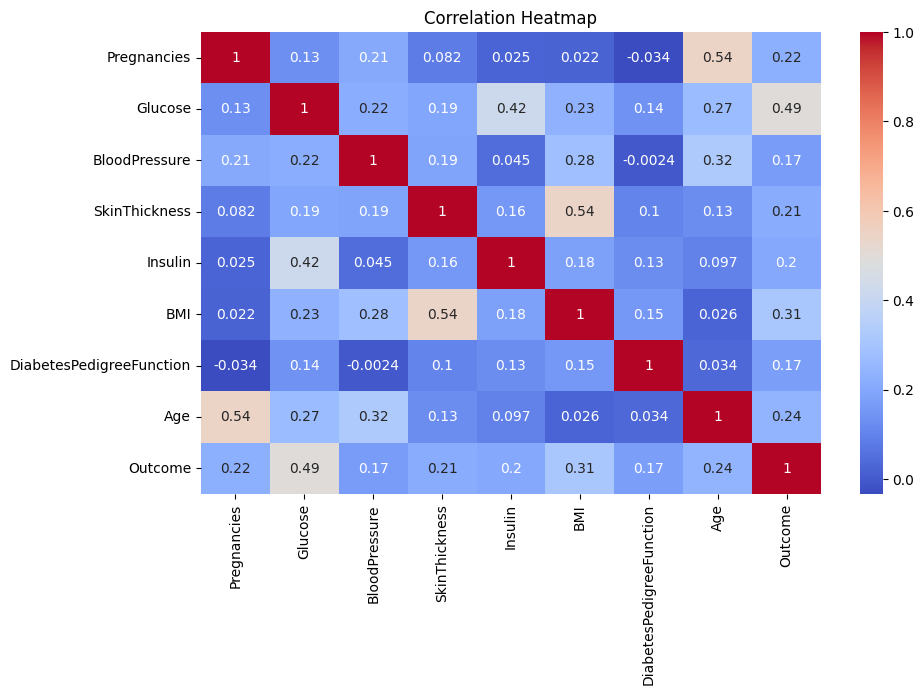


✅ Accuracy: 0.7532467532467533

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154


🧾 Confusion Matrix:
 [[82 17]
 [21 34]]


In [ ]:
# 📦 Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 🔗 Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
           "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

df = pd.read_csv(url, names=columns)

# 👀 View first few rows
print("📋 First 5 rows:\n", df.head())

# 📊 Data summary
print("\n🔍 Dataset Info:")
print(df.info())
print("\n📈 Statistics:\n", df.describe())

# 🧹 Check for zeros in important features (may indicate missing data)
zero_features = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
print("\n🔎 Zero count in columns:")
for feature in zero_features:
    print(f"{feature}: {(df[feature] == 0).sum()} zeros")

# ✏️ Replace zeros with NaN, then impute with median
df[zero_features] = df[zero_features].replace(0, np.nan)
df.fillna(df.median(), inplace=True)

# 📊 Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 📉 Pairplot (optional, uncomment to run)
# sns.pairplot(df, hue="Outcome")

# 🧪 Train-test split
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔄 Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🤖 Train logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# ✅ Predict and evaluate
y_pred = model.predict(X_test_scaled)

print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧾 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
